In [75]:
import glob
import os
import qtools

In [2]:
project = 'singlecell_pnms'

In [3]:
cd ~/projects/$project/scripts

/home/obotvinnik/processing_scripts/singlecell_pnms


In [4]:
jobname = '{project}_samtools_rmdup'.format(project=project)

# qtools.Submitter(commands, jobname, array=True, walltime='2:00:00')

In [5]:
! head -n 20 singlecell_pnms_samtools_rmdup.sh

#!/bin/bash
#PBS -N singlecell_pnms_samtools_rmdup
#PBS -o singlecell_pnms_samtools_rmdup.sh.out
#PBS -e singlecell_pnms_samtools_rmdup.sh.err
#PBS -V
#PBS -l walltime=2:00:00
#PBS -l nodes=1:ppn=1
#PBS -A yeo-group
#PBS -q home
#PBS -t 1-299

# Go to the directory from which the script was called
cd $PBS_O_WORKDIR
cmd[1]="samtools rmdup /oasis/tscc/scratch/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws/N2_08_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam /oasis/tscc/scratch/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws/rmdup/N2_08_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam"
cmd[2]="samtools rmdup /oasis/tscc/scratch/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws/P8_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam /oasis/tscc/scratch/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws/rmdup/P8_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam"
cmd[3]="samtools rmdup /oasis/tscc/scratch/obotvinnik/projects/sing

In [10]:
! tail singlecell_pnms_samtools_rmdup.sh.err-1

[bam_rmdup_core] inconsistent BAM file for pair 'HWI-ST1001:211:C1PUCACXX:2:2307:10700:87260'. Continue anyway.
[bam_rmdup_core] inconsistent BAM file for pair 'HWI-ST1001:211:C1PUCACXX:2:2108:16153:56967'. Continue anyway.
[bam_rmdup_core] inconsistent BAM file for pair 'HWI-ST1001:211:C1PUCACXX:2:2313:1539:37904'. Continue anyway.
[bam_rmdup_core] inconsistent BAM file for pair 'HWI-ST1001:211:C1PUCACXX:2:2212:4205:75993'. Continue anyway.
[bam_rmdup_core] inconsistent BAM file for pair 'HWI-ST1001:211:C1PUCACXX:2:2310:12906:72890'. Continue anyway.
[bam_rmdup_core] inconsistent BAM file for pair 'HWI-ST1001:211:C1PUCACXX:2:2215:17308:80609'. Continue anyway.
[bam_rmdup_core] inconsistent BAM file for pair 'HWI-ST1001:211:C1PUCACXX:2:2109:7878:31631'. Continue anyway.
[bam_rmdup_core] inconsistent BAM file for pair 'HWI-ST1001:211:C1PUCACXX:2:2201:11989:39959'. Continue anyway.
[bam_rmdup_core] 3 unmatched pairs
[bam_rmdup_core] 4854609 / 15997191 = 0.3035 in library 'foo'


In [14]:
! tail -n 1 singlecell_pnms_samtools_rmdup.sh.err-1*

==> singlecell_pnms_samtools_rmdup.sh.err-1 <==
[bam_rmdup_core] 4854609 / 15997191 = 0.3035 in library 'foo'

==> singlecell_pnms_samtools_rmdup.sh.err-10 <==
[bam_rmdup_core] 1285262 / 7022052 = 0.1830 in library 'foo'

==> singlecell_pnms_samtools_rmdup.sh.err-100 <==
[bam_rmdup_core] 64533084 / 94469832 = 0.6831 in library '	'

==> singlecell_pnms_samtools_rmdup.sh.err-101 <==
[bam_rmdup_core] 458 / 908 = 0.5044 in library 'foo'

==> singlecell_pnms_samtools_rmdup.sh.err-102 <==
[bam_rmdup_core] 2813903 / 10642014 = 0.2644 in library 'foo'

==> singlecell_pnms_samtools_rmdup.sh.err-103 <==
[bam_rmdup_core] 7559321 / 12022062 = 0.6288 in library 'foo'

==> singlecell_pnms_samtools_rmdup.sh.err-104 <==
[bam_rmdup_core] 3590569 / 13977968 = 0.2569 in library 'foo'

==> singlecell_pnms_samtools_rmdup.sh.err-105 <==
[bam_rmdup_core] 1316 / 376861 = 0.0035 in library 'foo'

==> singlecell_pnms_samtools_rmdup.sh.err-106 <==
[bam_rmdup_core] 3600922 / 12735851 = 0.2827 in library 'foo'

==

In [15]:
line = "[bam_rmdup_core] 4854609 / 15997191 = 0.3035 in library 'foo'"
line.split()

['[bam_rmdup_core]',
 '4854609',
 '/',
 '15997191',
 '=',
 '0.3035',
 'in',
 'library',
 "'foo'"]

In [12]:
jobname

'singlecell_pnms_samtools_rmdup'

In [11]:
lines = ! tail -n 1 $jobname*err* 
len(lines)

1001

In [56]:
'==> singlecell_pnms_samtools_rmdup.sh.err-99 <=='.split()[1].split('-')[-1]

'99'

## get the number of reads removed by rmdup

In [24]:
! grep '\[1\]' singlecell_pnms_samtools_rmdup.sh

cmd[1]="samtools rmdup /oasis/tscc/scratch/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws/N2_08_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam /oasis/tscc/scratch/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws/rmdup/N2_08_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam"


In [33]:
pattern = "'\[1\]'"

grepped = ! grep $pattern singlecell_pnms_samtools_rmdup.sh
grepped

['cmd[1]="samtools rmdup /oasis/tscc/scratch/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws/N2_08_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam /oasis/tscc/scratch/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws/rmdup/N2_08_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam"']

In [28]:
%pdb

Automatic pdb calling has been turned ON


In [42]:
import os
import pandas as pd

def get_number_reads(lines):
    for line in lines:
        if line.startswith('=='):
            err_filename = line.split()[1]
            index = int(err_filename.split('-')[-1])
            sh_filename = err_filename.split('.err')[0]
            pattern = "'\[{}\]'".format(index)
#             print(pattern)
            grepped = ! grep $pattern $sh_filename
#             print('grepped', grepped)
            bamfile = [x for x in grepped[0].split() if x.startswith('/oasis')][0]
            sample_id = '_'.join(os.path.basename(bamfile).split('_')[:2])
        elif line.startswith('['):
            if 'in library' in line:
                pieces = line.split()
                removed = int(pieces[1])
                total = int(pieces[3])
                percent = 100 * float(removed)/total
            else:
                removed = 0
                total = 0
                percent = 0
        else:
            yield sample_id, bamfile, index, sh_filename, removed, total, percent
            

reads_removed = pd.DataFrame.from_records(get_number_reads(lines), 
                                          columns=['sample_id', 'bam', 'sh_index', 'sh_filename', 
                                                   'removed', 'total', 'percent'])
reads_removed.head()

,sample_id,bam,sh_index,sh_filename,removed,total,percent
0,N2_08,/oasis/tscc/scratch/obotvinnik/projects/single...,1,singlecell_pnms_samtools_rmdup.sh,4854609,15997191,30.346634
1,M3_01,/oasis/tscc/scratch/obotvinnik/projects/single...,10,singlecell_pnms_samtools_rmdup.sh,1285262,7022052,18.303225
2,P9_04,/oasis/tscc/scratch/obotvinnik/projects/single...,100,singlecell_pnms_samtools_rmdup.sh,64533084,94469832,68.310785
3,M2nd_31,/oasis/tscc/scratch/obotvinnik/projects/single...,101,singlecell_pnms_samtools_rmdup.sh,458,908,50.440529
4,P2_07,/oasis/tscc/scratch/obotvinnik/projects/single...,102,singlecell_pnms_samtools_rmdup.sh,2813903,10642014,26.441452


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

In [85]:
figure_folder = 'figures/010_count_percent_reads_removed_by_samtools_rmdup'
! mkdir -p $figure_folder

In [86]:
import numpy as np

In [87]:
label = '% PCR duplicates removed\nby "samtools rmdup"'

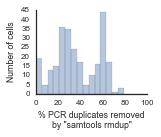

In [88]:
fig, ax = plt.subplots(figsize=(2, 1.5))

data = reads_removed['percent']
data = data[data > 0]

sns.distplot(data, kde=False, bins=np.linspace(0, 100, 20))
ax.set(xlim=(0, 100), xlabel=label, ylabel='Number of cells')
sns.despine()
fig.savefig('{}/percent_reads_removed.pdf'.format(figure_folder))

In [89]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import six

%matplotlib inline


import flotilla


flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'
study = flotilla.embark('singlecell_pnm', flotilla_dir=flotilla_dir)

2017-01-06 22:32:04	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm/datapackage.json
2017-01-06 22:32:04	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2017-01-06 22:32:21 	Initializing Study
2017-01-06 22:32:21 	Initializing Predictor configuration manager for Study
2017-01-06 22:32:21	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-06 22:32:21	Added ExtraTreesClassifier to default predictors
2017-01-06 22:32:21	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-06 22:32:21	Added ExtraTreesRegressor to default predictors
2017-01-06 22:32:21	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-06 22:32:21	Added GradientBoostingClassifier to default predictors
2

Error loading species hg19 data: HTTP Error 404: Not Found

In [90]:
reads_removed_metadata = reads_removed.join(study.metadata.data, on='sample_id')
print(reads_removed.shape)
reads_removed_metadata.head()

(333, 7)


,sample_id,bam,sh_index,sh_filename,removed,total,percent,single,pooled,phenotype,neuron,progenitor,stressed,craig_venter,differentiation_batch,split,outlier
0,N2_08,/oasis/tscc/scratch/obotvinnik/projects/single...,1,singlecell_pnms_samtools_rmdup.sh,4854609,15997191,30.346634,True,False,NPC,False,True,False,False,NaN,NaN,False
1,M3_01,/oasis/tscc/scratch/obotvinnik/projects/single...,10,singlecell_pnms_samtools_rmdup.sh,1285262,7022052,18.303225,True,False,MN,True,False,False,True,batch1,NaN,False
2,P9_04,/oasis/tscc/scratch/obotvinnik/projects/single...,100,singlecell_pnms_samtools_rmdup.sh,64533084,94469832,68.310785,True,False,iPSC,False,True,False,True,NaN,NaN,False
3,M2nd_31,/oasis/tscc/scratch/obotvinnik/projects/single...,101,singlecell_pnms_samtools_rmdup.sh,458,908,50.440529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P2_07,/oasis/tscc/scratch/obotvinnik/projects/single...,102,singlecell_pnms_samtools_rmdup.sh,2813903,10642014,26.441452,True,False,iPSC,False,True,False,True,NaN,NaN,False


In [94]:
reads_removed_metadata['sample_type'] = reads_removed_metadata.apply(lambda x: 'pooled' if x.pooled else 'single', axis=1)
reads_removed_metadata.head()

,sample_id,bam,sh_index,sh_filename,removed,total,percent,single,pooled,phenotype,neuron,progenitor,stressed,craig_venter,differentiation_batch,split,outlier,sample_type
0,N2_08,/oasis/tscc/scratch/obotvinnik/projects/single...,1,singlecell_pnms_samtools_rmdup.sh,4854609,15997191,30.346634,True,False,NPC,False,True,False,False,NaN,NaN,False,single
1,M3_01,/oasis/tscc/scratch/obotvinnik/projects/single...,10,singlecell_pnms_samtools_rmdup.sh,1285262,7022052,18.303225,True,False,MN,True,False,False,True,batch1,NaN,False,single
2,P9_04,/oasis/tscc/scratch/obotvinnik/projects/single...,100,singlecell_pnms_samtools_rmdup.sh,64533084,94469832,68.310785,True,False,iPSC,False,True,False,True,NaN,NaN,False,single
3,M2nd_31,/oasis/tscc/scratch/obotvinnik/projects/single...,101,singlecell_pnms_samtools_rmdup.sh,458,908,50.440529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pooled
4,P2_07,/oasis/tscc/scratch/obotvinnik/projects/single...,102,singlecell_pnms_samtools_rmdup.sh,2813903,10642014,26.441452,True,False,iPSC,False,True,False,True,NaN,NaN,False,single


In [104]:
cd ~/ipython_notebook/singlecell/manuscript/

/home/obotvinnik/ipython_notebook/singlecell/manuscript


In [105]:
! mkdir -p $figure_folder

ERROR! Session/line number was not unique in database. History logging moved to new session 61


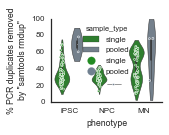

In [106]:
fig, ax = plt.subplots(figsize=(2, 1.5))

data = reads_removed_metadata.query('percent > 0')

palette = ['forestgreen', 'slategray']

sns.violinplot(x='phenotype', y='percent', hue='sample_type', data=data, 
               cut=True, palette=palette, linewidth=0.5, order=study.phenotype_order)
sns.stripplot(x='phenotype', y='percent', hue='sample_type', data=data,
              split=True, jitter=True, linewidth=0.5, edgecolor='white', 
              palette=palette, size=2, order=study.phenotype_order)
ax.set(ylim=(0, 100), ylabel='% PCR duplicates removed\nby "samtools rmdup"')
sns.despine()
# fig.tight_layout()
fig.savefig('{}/percent_reads_removed_violinplots_by_phenotype.pdf'.format(figure_folder))

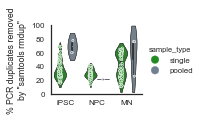

In [107]:

data = reads_removed_metadata.query('percent > 0')

palette = ['forestgreen', 'slategray']

g = sns.FacetGrid(data, hue='sample_type', palette=palette, size=1.5, aspect=1.25)

g.map(sns.violinplot, x='phenotype', y='percent', hue='sample_type', data=data, 
               cut=True, palette=palette, linewidth=0.5, order=study.phenotype_order)
g.map(sns.stripplot, x='phenotype', y='percent', hue='sample_type', data=data,
              split=True, jitter=True, linewidth=0.5, edgecolor='white', 
              palette=palette, size=2, order=study.phenotype_order)
for ax in g.axes.flat:
    ax.set(ylim=(0, 100), ylabel='% PCR duplicates removed\nby "samtools rmdup"')
g.add_legend()
# sns.despine()
# fig.tight_layout()
fig.savefig('{}/percent_reads_removed_violinplots_by_phenotype_facetgrid.pdf'.format(figure_folder))